# FELion Spectra
New Baseline correction and analysing method for FELion Spectra

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import rampy as rp
import rampy
from scipy.interpolate import interp1d as interpolate

%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(100)

# Making the plot vertical

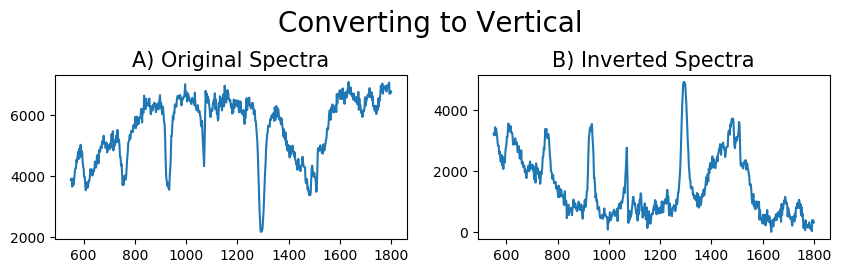

In [110]:
filename = "./DATA/16_11_18-3.felix"

data = np.genfromtxt(filename)
x, y = data[:,0], data[:,2]
y1 = y.max()-y

plt.figure(1)

plt.suptitle("Converting to Vertical", fontsize = 20)

plt.subplot(221)
plt.plot(x, y)
plt.title("A) Original Spectra", fontsize = 15)

plt.subplot(222)
plt.plot(x, y1)
plt.title("B) Inverted Spectra", fontsize = 15)

plt.subplots_adjust(top=0.85)
plt.show()
plt.close()

# Baseline Correction (using "automatic least square fitting following Eilers and Boelens 2005")

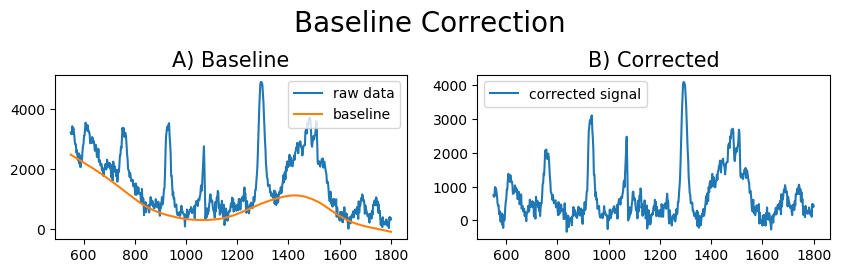

In [139]:
bir = np.array([[750., 920., 1300.]]) # the frequency regions devoid of signal, used by rp.baseline()

lamb = 10e4
p_value = 0.01
iterations = 10

y_corrected, baseline = rp.baseline(x, y1,bir,"als",lam = lamb, p = p_value, niter = iterations)

plt.figure(2)
plt.suptitle("Baseline Correction", fontsize = 20)

plt.subplot(221)
plt.plot(x, y1,label="raw data")
plt.plot(x,baseline,label="baseline")
plt.title("A) Baseline", fontsize = 15)
plt.legend()

plt.subplot(222)
plt.plot(x,y_corrected,label="corrected signal")
plt.title("B) Corrected", fontsize = 15)
plt.legend()

plt.subplots_adjust(top=0.85)
plt.show()
plt.close()

# Power Calibration

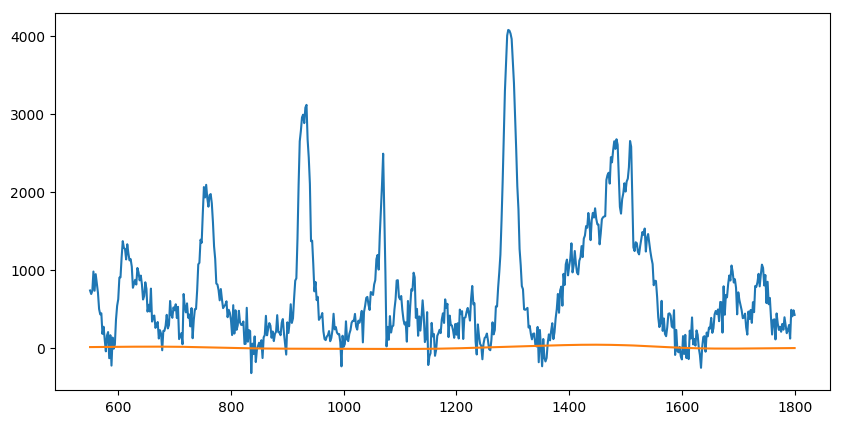

array([[ 425.74071356],
       [ 485.06559553],
       [ 407.89042748],
       [ 491.71510225],
       [ 122.53946489],
       [ 296.36330258],
       [ 232.18638901],
       [ 192.00846352],
       [ 295.32923884],
       [ 396.64840597],
       [ 236.96562179],
       [ 311.28049694],
       [ 211.09261503],
       [ 275.90152371],
       [ 235.2067468 ],
       [ 317.50777647],
       [ 446.80407822],
       [ 113.59508097],
       [ 371.38016166],
       [ 365.15868519],
       [ 176.92997356],
       [ 396.19330664],
       [ 646.9479448 ],
       [ 566.19310259],
       [ 854.42791875],
       [ 581.15146586],
       [ 941.86271586],
       [ 807.56057279],
       [1033.24382959],
       [1075.41118426],
       [ 948.06121275],
       [ 796.69236398],
       [ 957.80297515],
       [ 849.89128989],
       [ 790.95543902],
       [ 801.49345348],
       [ 466.50327143],
       [ 593.98273706],
       [ 328.92964077],
       [ 494.34170391],
       [ 379.71661063],
       [ 474.051

In [153]:
powerfile = './DATA/16_11_18-3.pow'
shots = 16
power = np.genfromtxt(powerfile)
power_wn = power[:,0]
power_mj = power[:,1]

interpol = interpolate(power_wn, power_mj, kind = 'linear', fill_value = 'extrapolate')

power_extrapolated = interpol(x)
power_extrapolated = power_extrapolated*16

y_new, new_baseline = rp.baseline(x, y_corrected,bir,"als",lam = lamb*10, p = p_value, niter = iterations)

plt.figure(3)
plt.plot(x, y_new)
plt.plot(x, new_baseline)

plt.show()
plt.close()

y_normalised = (y_new-new_baseline)
y_normalised

In [7]:
help(rp.baseline)

Help on function baseline in module rampy.baseline:

baseline(x_input, y_input, bir, method, **kwargs)
    Allows subtracting a baseline under a x y spectrum.
    
    Parameters
    ----------
    x_input : ndarray
        x values.
    y_input : ndarray
        y values.
    bir : ndarray
        Contain the regions of interest, organised per line. 
        For instance, roi = np.array([[100., 200.],[500.,600.]]) will 
        define roi between 100 and 200 as well as between 500 and 600.
        Note: This is NOT used by the "als" and "arPLS" algorithms, but still is a requirement when calling the function.
        bir and method probably will become args in a futur iteration of rampy to solve this.
    methods : str
        "poly": polynomial fitting, with splinesmooth the degree of the polynomial.
        "unispline": spline with the UnivariateSpline function of Scipy, splinesmooth is 
                     the spline smoothing factor (assume equal weight in the present case);
    